<a href="https://colab.research.google.com/github/maicken/INF442_P8/blob/master/Pedestrian_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pedestrians

In [0]:
# We will make a analysis about the kind os accidents that happen to pedesters
# They are part of x % of the accidents that happen

# import required libraries
import pandas as pd
import numpy as np

In [12]:
# Mounting drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
# Getting the dataframe that we will use to analyse
%cd "gdrive/My Drive/Colab Notebooks/INF442_P8"

[Errno 2] No such file or directory: 'gdrive/My Drive/Colab Notebooks/INF442_P8'
/content/gdrive/My Drive/Colab Notebooks/INF442_P8


In [14]:
df = pd.read_csv('dataframe.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232233 entries, 0 to 1232232
Data columns (total 30 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   num_acc  1232233 non-null  int64  
 1   num_veh  1232233 non-null  object 
 2   place    1232233 non-null  float64
 3   catu     1232233 non-null  int64  
 4   grav     1232233 non-null  int64  
 5   age      1232233 non-null  float64
 6   trajet   1232233 non-null  float64
 7   secu     1232233 non-null  float64
 8   locp     1232233 non-null  float64
 9   actp     1232233 non-null  float64
 10  etatp    1232233 non-null  float64
 11  an       1232233 non-null  int64  
 12  lum      1232233 non-null  int64  
 13  dep      1232233 non-null  int64  
 14  agg      1232233 non-null  int64  
 15  int      1232233 non-null  int64  
 16  atm      1232233 non-null  float64
 17  col      1232233 non-null  float64
 18  catr     1232233 non-null  int64  
 19  circ     1232233 non-null  float64
 20  nb

,num_acc,num_veh,place,catu,grav,age,trajet,secu,locp,actp,etatp,an,lum,dep,agg,int,atm,col,catr,circ,nbv,vosp,plan,surf,infra,situ,catv,obs,choc,manv
0,201800000001,B01,1.0,1,3,90.0,0.0,11.0,0.0,0.0,0.0,18,1,590,1,4,1.0,1.0,3,2.0,2.0,0.0,3.0,1.0,0.0,1.0,3,2.0,3.0,1.0
1,201800000001,A01,1.0,1,1,58.0,5.0,11.0,0.0,0.0,0.0,18,1,590,1,4,1.0,1.0,3,2.0,2.0,0.0,3.0,1.0,0.0,1.0,3,2.0,2.0,15.0
2,201800000002,A01,1.0,1,1,71.0,0.0,11.0,0.0,0.0,0.0,18,1,590,2,7,7.0,7.0,4,2.0,2.0,0.0,2.0,1.0,0.0,1.0,3,1.0,0.0,1.0
3,201800000002,A01,1.0,3,4,59.0,0.0,2.0,2.0,3.0,1.0,18,1,590,2,7,7.0,7.0,4,2.0,2.0,0.0,2.0,1.0,0.0,1.0,3,1.0,0.0,1.0
4,201800000003,A01,1.0,1,3,31.0,5.0,21.0,0.0,0.0,0.0,18,1,590,2,3,1.0,7.0,3,2.0,2.0,0.0,1.0,1.0,0.0,1.0,2,2.0,1.0,1.0


In [15]:
# First thing we swap 2 and 4 in grav to make more sense
df.replace({'grav': {2: -1}})
df.replace({'grav': {4: 2}})
df.replace({'grav': {-1: 4}})

,num_acc,num_veh,place,catu,grav,age,trajet,secu,locp,actp,etatp,an,lum,dep,agg,int,atm,col,catr,circ,nbv,vosp,plan,surf,infra,situ,catv,obs,choc,manv
0,201800000001,B01,1.0,1,3,90.0,0.0,11.0,0.0,0.0,0.0,18,1,590,1,4,1.0,1.0,3,2.0,2.0,0.0,3.0,1.0,0.0,1.0,3,2.0,3.0,1.0
1,201800000001,A01,1.0,1,1,58.0,5.0,11.0,0.0,0.0,0.0,18,1,590,1,4,1.0,1.0,3,2.0,2.0,0.0,3.0,1.0,0.0,1.0,3,2.0,2.0,15.0
2,201800000002,A01,1.0,1,1,71.0,0.0,11.0,0.0,0.0,0.0,18,1,590,2,7,7.0,7.0,4,2.0,2.0,0.0,2.0,1.0,0.0,1.0,3,1.0,0.0,1.0
3,201800000002,A01,1.0,3,4,59.0,0.0,2.0,2.0,3.0,1.0,18,1,590,2,7,7.0,7.0,4,2.0,2.0,0.0,2.0,1.0,0.0,1.0,3,1.0,0.0,1.0
4,201800000003,A01,1.0,1,3,31.0,5.0,21.0,0.0,0.0,0.0,18,1,590,2,3,1.0,7.0,3,2.0,2.0,0.0,1.0,1.0,0.0,1.0,2,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232228,201000069384,A01,1.0,1,4,41.0,9.0,13.0,0.0,0.0,0.0,10,3,974,1,1,1.0,7.0,2,1.0,2.0,0.0,1.0,1.0,0.0,3.0,3,7.0,1.0,1.0
1232229,201000069385,B01,1.0,1,4,29.0,9.0,93.0,0.0,0.0,0.0,10,2,974,2,1,1.0,3.0,4,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1,2.0,1.0,21.0
1232230,201000069385,A01,1.0,1,1,28.0,9.0,11.0,0.0,0.0,0.0,10,2,974,2,1,1.0,3.0,4,2.0,1.0,0.0,1.0,1.0,0.0,1.0,3,2.0,3.0,15.0
1232231,201000069386,B01,1.0,1,4,14.0,9.0,22.0,0.0,0.0,0.0,10,3,974,2,1,1.0,3.0,4,2.0,2.0,0.0,1.0,1.0,0.0,1.0,1,2.0,1.0,17.0


In [16]:
df_pedestrians = df[df.catu == 3]
df_pedestrians_others = df[df.catu == 4]
df_p_all = pd.concat([df_pedestrians, df_pedestrians_others])
df_p_all

,num_acc,num_veh,place,catu,grav,age,trajet,secu,locp,actp,etatp,an,lum,dep,agg,int,atm,col,catr,circ,nbv,vosp,plan,surf,infra,situ,catv,obs,choc,manv
3,201800000002,A01,1.0,3,4,59.0,0.0,2.0,2.0,3.0,1.0,18,1,590,2,7,7.0,7.0,4,2.0,2.0,0.0,2.0,1.0,0.0,1.0,3,1.0,0.0,1.0
13,201800000006,A01,1.0,3,3,59.0,0.0,2.0,0.0,0.0,0.0,18,2,590,2,1,2.0,6.0,3,0.0,2.0,0.0,2.0,2.0,0.0,3.0,3,1.0,2.0,1.0
16,201800000008,A01,1.0,3,2,74.0,5.0,2.0,3.0,3.0,1.0,18,5,590,2,1,1.0,6.0,4,2.0,2.0,0.0,1.0,1.0,0.0,1.0,3,1.0,2.0,1.0
30,201800000014,A01,1.0,3,3,89.0,5.0,2.0,1.0,3.0,1.0,18,1,590,2,1,1.0,6.0,3,2.0,2.0,0.0,1.0,1.0,0.0,1.0,3,1.0,2.0,1.0
33,201800000016,A01,1.0,3,4,14.0,2.0,2.0,3.0,3.0,1.0,18,2,590,2,2,1.0,6.0,3,2.0,2.0,2.0,1.0,1.0,6.0,1.0,3,1.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230483,201000068546,A01,1.0,4,4,52.0,0.0,93.0,0.0,1.0,1.0,10,1,972,2,6,1.0,6.0,3,2.0,2.0,0.0,3.0,1.0,0.0,1.0,3,1.0,2.0,2.0
1230883,201000068720,A01,1.0,4,4,3.0,5.0,93.0,2.0,3.0,1.0,10,5,973,2,1,1.0,6.0,4,1.0,2.0,0.0,1.0,1.0,0.0,1.0,3,1.0,0.0,1.0
1230904,201000068729,A01,1.0,4,4,28.0,0.0,93.0,0.0,1.0,3.0,10,1,973,1,1,1.0,6.0,4,2.0,2.0,0.0,1.0,1.0,0.0,1.0,3,1.0,0.0,1.0
1231142,201000068845,A01,1.0,4,3,38.0,5.0,93.0,0.0,1.0,1.0,10,2,974,1,1,1.0,6.0,2,3.0,4.0,0.0,1.0,1.0,0.0,1.0,3,1.0,1.0,2.0


In [0]:
df_p_year = []
for i in range(9):
  df_p_year.append(df_p_all[df_p_all.an == 10 + i])

In [18]:
# Some histogramas to analyse vehicules

print("Histograms for data of pedesters")
print()
print(df_p_all['catu'].value_counts())
print()
print(df_p_all['grav'].value_counts())
print()
print(df_p_all['age'].value_counts())
print()
print(df_p_all['locp'].value_counts())
print()
print(df_p_all['actp'].value_counts())
print()
print(df_p_all['etatp'].value_counts())
print()
print(df_p_all['an'].value_counts())
print()
print(df_p_all['lum'].value_counts())
print()
print(df_p_all['agg'].value_counts())
print()
print(df_p_all['int'].value_counts())
print()
print(df_p_all['atm'].value_counts())
print()
print(df_p_all['catr'].value_counts())
print()
print(df_p_all['circ'].value_counts())
print()
print(df_p_all['nbv'].value_counts())
print()
print(df_p_all['vosp'].value_counts())
print()
print(df_p_all['surf'].value_counts())
print()
print(df_p_all['infra'].value_counts())
print()
print(df_p_all['situ'].value_counts())
print()
print(df_p_all['catv'].value_counts())
print()

Histograms for data of pedesters

3    107376
4      2120
Name: catu, dtype: int64

4    63002
3    39668
2     4783
1     2043
Name: grav, dtype: int64

12.0     2538
16.0     2282
13.0     2244
11.0     2143
15.0     2120
         ... 
105.0       2
102.0       2
104.0       2
101.0       2
103.0       1
Name: age, Length: 107, dtype: int64

2.0    25370
4.0    24696
3.0    23955
1.0    14865
0.0    10530
5.0     6682
6.0     2147
8.0     1134
7.0      117
Name: locp, dtype: int64

3.0    79021
9.0     7303
5.0     6347
1.0     6061
0.0     5553
2.0     2892
4.0     2070
6.0      249
Name: actp, dtype: int64

1.0    78610
2.0    20599
0.0     5801
3.0     4486
Name: etatp, dtype: int64

10    13232
11    13087
12    12368
14    12286
13    12037
15    11893
16    11831
17    11802
18    10960
Name: an, dtype: int64

1    78717
5    19325
2     6601
3     3903
4      950
Name: lum, dtype: int64

2    102050
1      7446
Name: agg, dtype: int64

1    78524
2    11639
3     9068
6     23

Conlusion: measures for children and adolescents are really relevant and necessary.

When there are two ways in a road, there are greater chances of an accident happening.

The biggest danger for pedestrian are cars as expected, followed by motocycles and heavy vehicles.

People alone have more risks.

Relevant parameters for pedesters: num_acc, an, lum, agg, int, atm, catr, circ, nbv, vosp, surf, infra, situ, catu, grav, age, locp, actp, etatp, catv

In [0]:
# Create the X
df_filtered = df[['num_acc', 'an', 'lum','agg', 'int', 'atm', 'catr', 'circ', 'nbv', 'vosp', 'surf', 'infra', 'situ', 'catu', 'age', 'locp', 'actp', 'etatp', 'catv']].copy()
df_t = df_filtered[df_filtered.catu == 4]
df_filtered = df_filtered[df_filtered.catu == 3]
df_filtered = pd.concat([df_filtered, df_t])

# Create the y
df_grav = df[['num_acc', 'grav', 'catu']]
df_t = df_grav[df_grav.catu == 4]
df_grav = df_grav[df_grav.catu == 3]
df_grav = pd.concat([df_grav, df_t])

# creating initial dataframe

dum_df = pd.get_dummies(df_filtered, columns=["an", "lum", "agg", "catu", "locp", "actp", "etatp", "catv", "int", "atm",
                                              "catr", "circ", "nbv", "vosp", "surf", "infra", "situ"], 
                        prefix=["an_is", "lum_is", "agg_is", "catu_is", "locp_is", "actp_is", "etatp_is", "catv_is", "int_is", "atm_is",
                                              "catr_is", "circ_is", "nbv_is", "vosp_is", "surf_is", "infra_is", "situ_is"])

# dum_df_grav = pd.get_dummies(df_grav, columns=["grav"], prefix=["grav_is"])


In [20]:
import statsmodels.api as sm

X = dum_df ## X usually means our input variables (or independent variables)
y = df_grav['grav'] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an interctarget = pd.DataFrame(data.target, columns=["MEDV"])ept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   grav   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 17 May 2020   Prob (F-statistic):               0.00
Time:                        04:55:24   Log-Likelihood:            -1.0417e+05
No. Observations:              109496   AIC:                         2.085e+05
Df Residuals:                  109394   BIC:                         2.095e+05
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0003      0.000     -1.163      0.245      -0.001       0.000
num_acc                   1.624e-11   2.87e-13     56.568      0.000    1.57e-11    1.68e-11
age                         -0.0043   7.88e-05    -54.771      0.000      -0.004      -0.004
an_is_10                     0.0155      0.005      2.967      0.003       0.005       0.026
an_is_11                    -0.0049      0.005     -0.933      0.351      -0.015       0.005
an_is_12                     0.0084      0.005      1.580      0.114      -0.002       0.019
an_is_13                     0.0088      0.005      1.628      0.104      -0.002       0.019
an_is_14                     0.0039      0.005      0.730      0.465      -0.007       0.014
an_is_15                    -0.0064      0.005     -1.171      0.242      -0.017       0.004
an_is_16                    -0.0294      0.005     -5.385      0.000      -0.040      -0.019
an_is_17                    -0.0243      0.005     -4.440      0.000      -0.035      -0.014
an_is_18                     0.0283      0.007      4.298      0.000       0.015       0.041
lum_is_1                     0.1105      0.005     20.197      0.000       0.100       0.121
lum_is_2                     0.0730      0.008      9.327      0.000       0.058       0.088
lum_is_3                    -0.1935      0.010    -19.171      0.000      -0.213      -0.174
lum_is_4                    -0.0445      0.017     -2.692      0.007      -0.077      -0.012
lum_is_5                     0.0546      0.006      8.801      0.000       0.042       0.067
agg_is_1                    -0.1071      0.005    -23.411      0.000      -0.116      -0.098
agg_is_2                     0.1072      0.005     23.421      0.000       0.098       0.116
catu_is_3                    0.0025      0.007      0.363      0.717      -0.011       0.016
catu_is_4                   -0.0025      0.007     -0.356      0.722      -0.016       0.011
locp_is_0.0                  0.0003      0.009      0.030      0.976      -0.018       0.019
locp_is_1.0                 -0.0770      0.009     -8.887      0.000      -0.094      -0.060
locp_is_2.0                  0.0062      0.008      0.750      0.453      -0.010       0.023
locp_is_3.0                  0.0706      0.009      8.245      0.000       0.054       0.087
locp_is_4.0                  0.0577      0.009      6.689      0.000       0.041       0.075
locp_is_5.0                 -0.0060      0.012     -0.519      0.604      -0.029       0.017
locp_is_6.0                 -0.0784      0.015     -5.207      0.000      -0.108      -0.049
locp_is_7.0                 -0.0728      0.052     -1.408      0.159      -0.174       0.029
locp_is_8.0                  0.0995      0.018      5.476      0.000       0.064       0.135
actp_is_0.0   

We identify that there are factor that are more important to gravity.

We separate the columns that have more interesting results, that are: locp is 8.0, agg is 2, lum is 1, actp is 4. 

People with animals have less chances of having an accident that is hard.

In [21]:
X = dum_df[['locp_is_8.0', 'agg_is_2', 'lum_is_1', 'actp_is_4.0', 'infra_is_7.0', 'catr_is_4', 'int_is_2', 'lum_is_1']] ## X usually means our input variables (or independent variables)
y = df_grav['grav'] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an interctarget = pd.DataFrame(data.target, columns=["MEDV"])ept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   grav   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1141.
Date:                Sun, 17 May 2020   Prob (F-statistic):               0.00
Time:                        04:55:24   Log-Likelihood:            -1.0771e+05
No. Observations:              109496   AIC:                         2.154e+05
Df Residuals:                  109488   BIC:                         2.155e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.9041      0.008    355.979      0.000       2.888       2.920
locp_is_8.0      0.1014      0.019      5.235      0.000       0.063       0.139
agg_is_2         0.4015      0.008     48.819      0.000       0.385       0.418
lum_is_1      2.187e+11   4.47e+11      0.489      0.625   -6.57e+11    1.09e+12
actp_is_4.0      0.0244      0.014      1.701      0.089      -0.004       0.053
infra_is_7.0     0.0817      0.130      0.630      0.529      -0.172       0.336
catr_is_4        0.2217      0.004     49.883      0.000       0.213       0.230
int_is_2         0.1234      0.006     19.344      0.000       0.111       0.136
lum_is_1     -2.187e+11   4.47e+11     -0.489      0.625   -1.09e+12    6.57e+11
==============================================================================
Omnibus:                    26196.986   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60704.534
Skew:                          -1.354   Prob(JB):                         0.00
Kurtosis:                       5.445   Cond. No.                     6.14e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Another analysis with pedestrians

In [22]:
print()
print(pd.cut(df_p_all.age, bins=11, right=False).value_counts())
print()


[9.545, 19.091)      20746
[19.091, 28.636)     12091
[47.727, 57.273)     11422
[0.0, 9.545)         11286
[28.636, 38.182)     10346
[57.273, 66.818)     10168
[66.818, 76.364)     10139
[76.364, 85.909)      9493
[38.182, 47.727)      9316
[85.909, 95.455)      4342
[95.455, 105.105)      147
Name: age, dtype: int64



Analysis with schools:



In [23]:
df_l = pd.read_csv('lieux.csv')
df_l = df_l[['Num_Acc', 'env1']].copy()
df_p_all = df_p_all.join(df_l.set_index('Num_Acc'), on='num_acc')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
df_p_all.info()
print()
print(df_p_all['env1'].value_counts())
print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109496 entries, 3 to 1231160
Data columns (total 31 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   num_acc  109496 non-null  int64  
 1   num_veh  109496 non-null  object 
 2   place    109496 non-null  float64
 3   catu     109496 non-null  int64  
 4   grav     109496 non-null  int64  
 5   age      109496 non-null  float64
 6   trajet   109496 non-null  float64
 7   secu     109496 non-null  float64
 8   locp     109496 non-null  float64
 9   actp     109496 non-null  float64
 10  etatp    109496 non-null  float64
 11  an       109496 non-null  int64  
 12  lum      109496 non-null  int64  
 13  dep      109496 non-null  int64  
 14  agg      109496 non-null  int64  
 15  int      109496 non-null  int64  
 16  atm      109496 non-null  float64
 17  col      109496 non-null  float64
 18  catr     109496 non-null  int64  
 19  circ     109496 non-null  float64
 20  nbv      109496 non-null 

In [0]:
df_p_all['env1'].fillna(0, inplace=True)

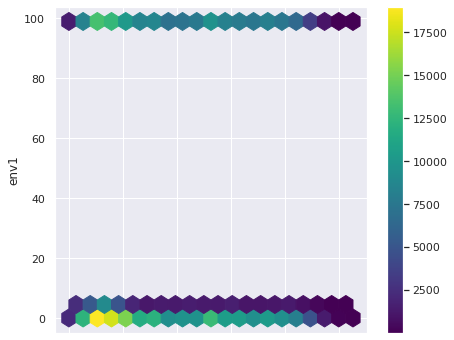

In [28]:
# Use seaborn style defaults and set the default figure size
import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook
import seaborn as sns

df3 = df_p_all[['grav', 'env1', 'age']].copy()

sns.set(rc={'figure.figsize':(7, 6)})

ax = df3.plot.hexbin(x='age',
                    y='env1',
                    C='grav',
                    reduce_C_function=np.sum,
                    gridsize=20,
                    cmap="viridis")

Inconclusive since we don't know what they mean by the labels 0, 3 and 99. But with understanding what each one means, it's possible to drag an analysis.

But it seems that the concentration of children and teenagers that suffers accidents are related to the label 0 of env1.